<a href="https://colab.research.google.com/github/vkvinay0627/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
#connecting colab with google drive for importing data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all necessary libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading and storing data with pandas
d=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Online Retail.xlsx")
d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# dataset info
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#checking for null values
d.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Dropping Null values present in the dataset

In [ ]:
#dropping all the null values
d.dropna(inplace=True)

In [ ]:
#checking number of records
d.shape

(406829, 8)

It is mentioned in the problem statement that column InvoiceNo which starts with 'c' indicates cancellation which is redundant data so we must drop this data.

In [ ]:
#converting invoice number to string for getting cancelled orders
d['InvoiceNo']=d['InvoiceNo'].astype('str')

In [ ]:
#displaying all the cancelled orders
d[d['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Their are 8905 cancelled orders

In [ ]:
#storing all not cancelled order
d=d[~d['InvoiceNo'].str.contains("C")]

In [ ]:
#number of data present
d.shape

(397924, 8)

In [ ]:
# statistical info
d.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


##**Exploratory Data Analysis**

In [ ]:
#exploring most sold item name
disdat=d['Description'].value_counts().reset_index()
disdat.rename(columns={'index':'Item_Name'},inplace=True)
disdat.rename(columns={'Description':'Count'},inplace=True)
disdat.head()

,Item_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [ ]:
#exploring least sold item name
disdat.tail()

,Item_Name,Count
3872,PINK SMALL GLASS CAKE STAND,1
3873,JARDIN ETCHED GLASS BUTTER DISH,1
3874,SET/3 TALL GLASS CANDLE HOLDER PINK,1
3875,M/COLOUR POM-POM CURTAIN,1
3876,JAM JAR WITH BLUE LID,1


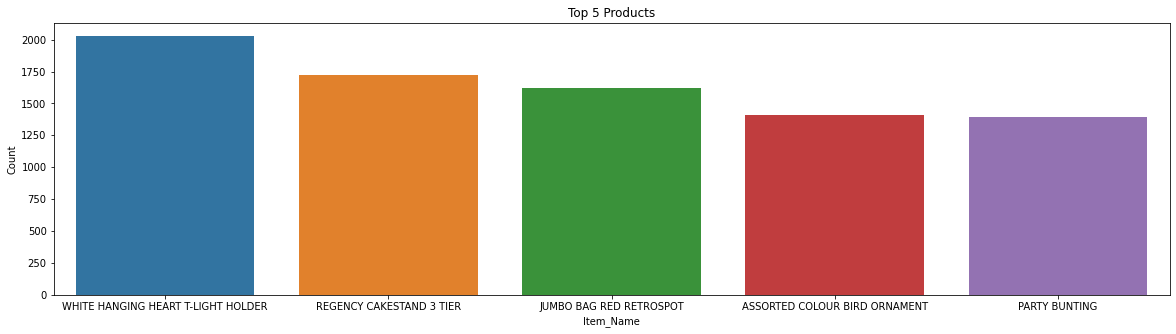

In [ ]:
#visualizing top 5 products
plt.figure(figsize=(20,5))
plt.title('Top 5 Products')
sns.barplot(x='Item_Name',y='Count',data=disdat[:5])

**Top 5 maximum Sold products are**


1.   	WHITE HANGING HEART T-LIGHT HOLDER
2.   REGENCY CAKESTAND 3 TIER
3.JUMBO BAG RED RETROSPOT
4.ASSORTED COLOUR BIRD ORNAMENT
5.PARTY BUNTING



**Bottom 5 least Sold products are**


1.   	CAT WITH SUNGLASSES BLANK CARD
2.   PINK CRYSTAL GUITAR PHONE CHARM
3.FOOD COVER WITH BEADS , SET 2 SIZES
4.GLASS BEAD HOOP EARRINGS BLACK
5.	ROSE PENDANT TRIPLE SHELL NECKLACE

In [ ]:
#products sold according to their quantity
k=d.groupby('Description')['Quantity'].sum().sort_values(ascending=False)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


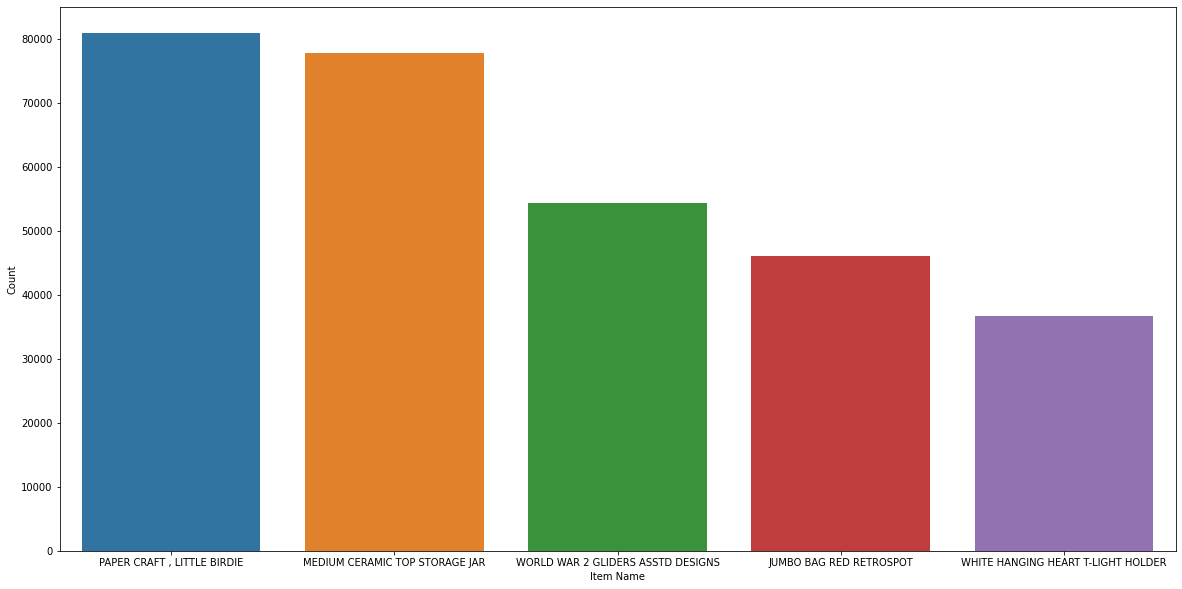

In [ ]:
#Top 5products sold according to their quantity
k=d.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
t=k[:5]
x=t.index
y=t
plt.figure(figsize=(20,10))
ax=sns.barplot(x,y)
ax.set(xlabel='Item Name', ylabel="Count")
plt.show()
#print(t)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


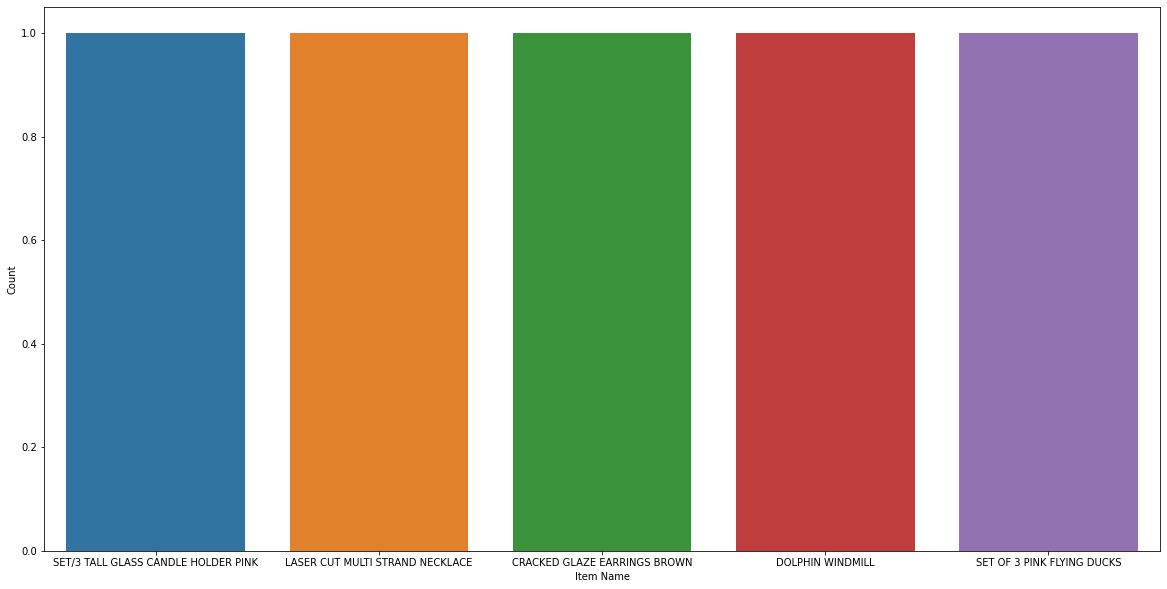

Description
SET/3 TALL GLASS CANDLE HOLDER PINK    1
LASER CUT MULTI STRAND NECKLACE        1
CRACKED GLAZE EARRINGS BROWN           1
DOLPHIN WINDMILL                       1
SET OF 3 PINK FLYING DUCKS             1
Name: Quantity, dtype: int64


In [ ]:
#Bottom 5products sold according to their quantity
k=d.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
t=k[-5:]
x=t.index
y=t
plt.figure(figsize=(20,10))
ax=sns.barplot(x,y)
ax.set(xlabel='Item Name', ylabel="Count")
plt.show()
print(t)

**Top 5 maximum Sold products according to quantity are**


1.   	PAPER CRAFT , LITTLE BIRDIE       
2. MEDIUM CERAMIC TOP STORAGE JAR   
3.WORLD WAR 2 GLIDERS ASSTD DESIGNS    
4.JUMBO BAG RED RETROSPOT          
5.WHITE HANGING HEART T-LIGHT HOLDER 

**Bottom 5 least Sold products according to quantity are**


1.   	SET/3 TALL GLASS CANDLE HOLDER PINK    
2.LASER CUT MULTI STRAND NECKLACE        
3.CRACKED GLAZE EARRINGS BROWN           
4.DOLPHIN WINDMILL                       
5.SET OF 3 PINK FLYING DUCKS  

In [ ]:
d.groupby('Description')['StockCode'].nunique()

Description
 4 PURPLE FLOCK DINNER CANDLES      1
 50'S CHRISTMAS GIFT BAG LARGE      1
 DOLLY GIRL BEAKER                  1
 I LOVE LONDON MINI BACKPACK        1
 I LOVE LONDON MINI RUCKSACK        1
                                   ..
ZINC T-LIGHT HOLDER STARS SMALL     1
ZINC TOP  2 DOOR WOODEN SHELF       1
ZINC WILLIE WINKIE  CANDLE STICK    1
ZINC WIRE KITCHEN ORGANISER         1
ZINC WIRE SWEETHEART LETTER TRAY    1
Name: StockCode, Length: 3877, dtype: int64

In [ ]:
condat=d['Country'].value_counts().reset_index()
condat.rename(columns={'index':'Countries'},inplace=True)
condat.rename(columns={'Country':'Count'},inplace=True)
print(condat.head())
print("--"*30)
print(condat.tail())

        Countries   Count
0  United Kingdom  354345
1         Germany    9042
2          France    8342
3            EIRE    7238
4           Spain    2485
------------------------------------------------------------
         Countries  Count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9


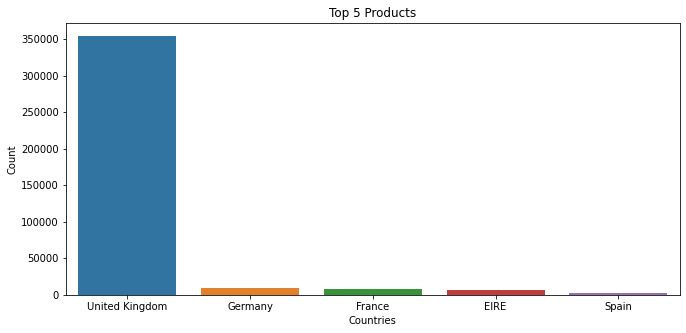

In [ ]:
plt.figure(figsize=(11,5))
plt.title('Top 5 Products')
sns.barplot(x='Countries',y='Count',data=condat[:5])

The Customers are mostly from United Kingdom

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


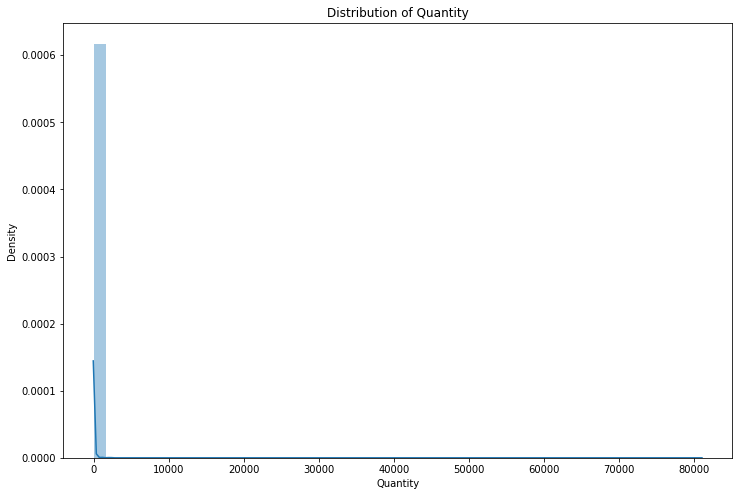

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Quantity')
sns.distplot(d['Quantity'])

Using Log transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


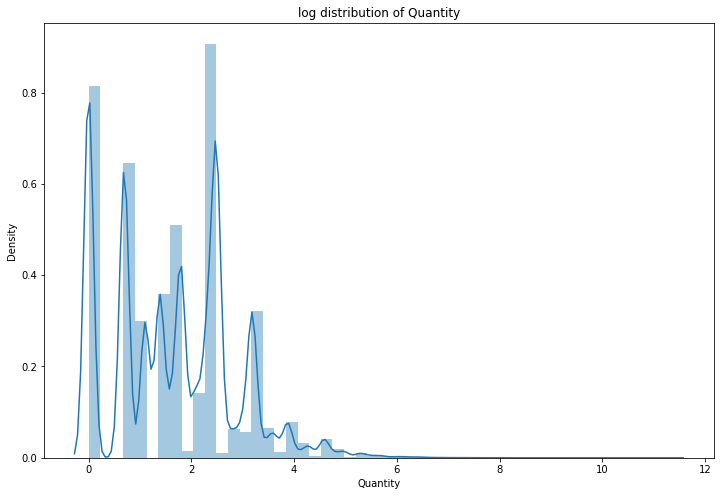

In [ ]:
plt.figure(figsize=(12,8))
plt.title('log distribution of Quantity')
sns.distplot(np.log(d['Quantity']))

Distribution for Unit price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


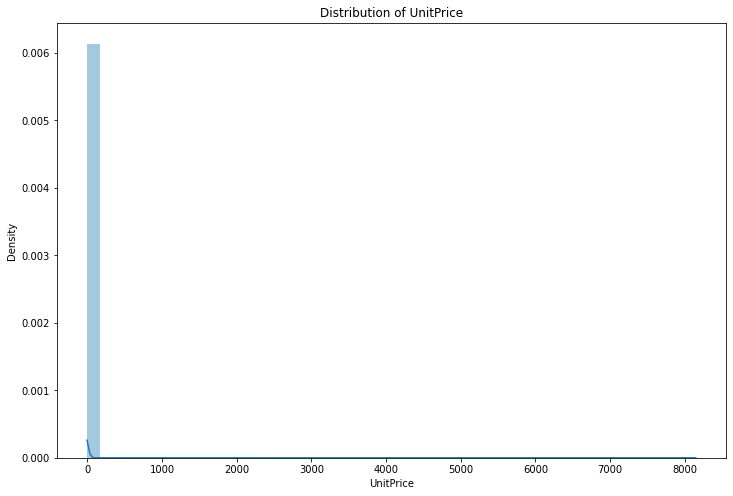

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Distribution of UnitPrice')
sns.distplot(d['UnitPrice'])

For any succesfull purchase the unit price should be greater than zero

In [ ]:
#dropping if any unit price less than zero or free
d=d[d['UnitPrice']>0]

##**Feature Engineering**

Converting invoice data into date time stamp

In [ ]:
#Converting invoice data into date time stamp
d["InvoiceDate"] = pd.to_datetime(d["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#seperating all the day month and year into different columns
d['Day']=d['InvoiceDate'].dt.day_name()
d["year"] = d["InvoiceDate"].apply(lambda x: x.year)
d["month_num"] = d["InvoiceDate"].apply(lambda x: x.month)
d["day_num"] = d["InvoiceDate"].apply(lambda x: x.day)
d['Month']=d['InvoiceDate'].dt.month_name()
d["hour"] = d["InvoiceDate"].apply(lambda x: x.hour)
d["minute"] = d["InvoiceDate"].apply(lambda x: x.minute)

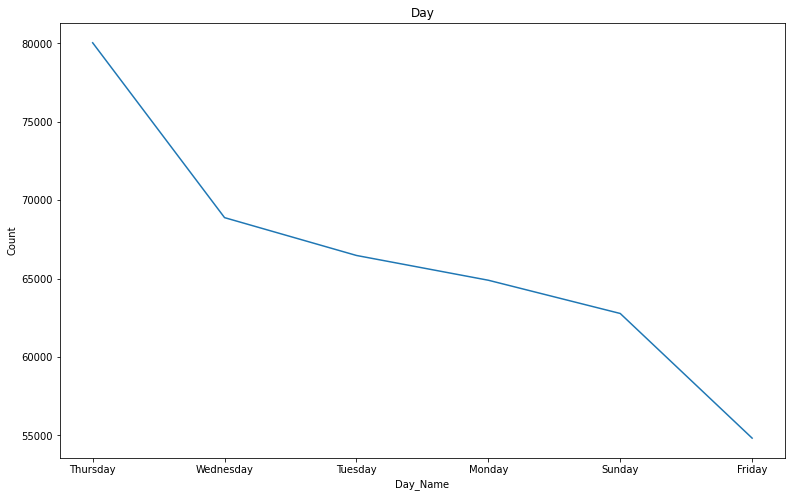

In [ ]:
#visualizing according to day
dayd=d['Day'].value_counts().reset_index()
dayd.rename(columns={'index': 'Day_Name'}, inplace=True)
dayd.rename(columns={'Day': 'Count'}, inplace=True)
plt.figure(figsize=(13,8))
plt.title('Day')
sns.lineplot(x='Day_Name',y='Count',data=dayd)


It is clear that most Sales are on Thrusday>Wednesday>Tuesday respectively

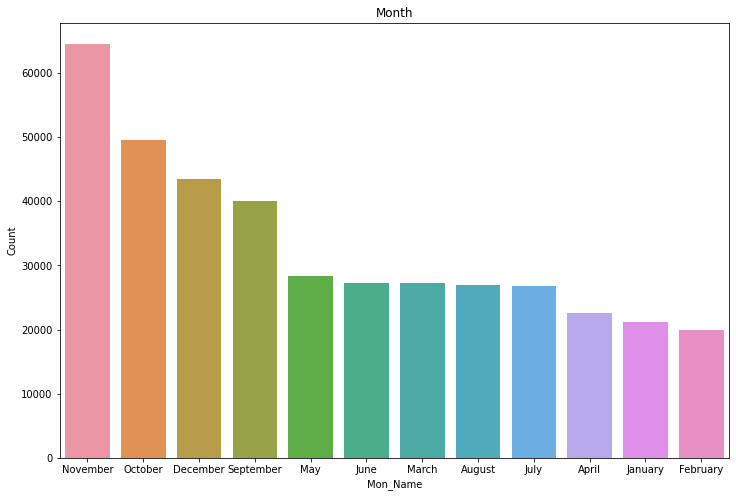

In [ ]:
#visualizing according to month
mond=d['Month'].value_counts().reset_index()
mond.rename(columns={'index': 'Mon_Name'}, inplace=True)
mond.rename(columns={'Month': 'Count'}, inplace=True)
plt.figure(figsize=(12,8))
plt.title('Month')
sns.barplot(x='Mon_Name',y='Count',data=mond)


It is clear that most of the sales are in Year end November> October> December

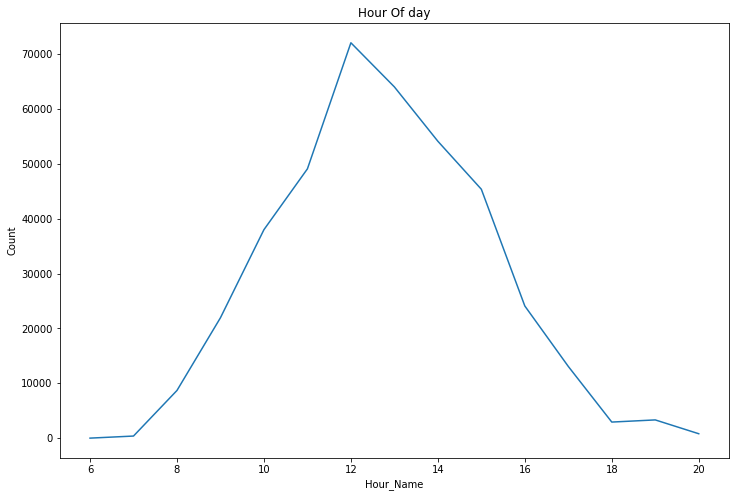

In [ ]:
#visualizing according to hour
hord=d['hour'].value_counts().reset_index()
hord.rename(columns={'index': 'Hour_Name'}, inplace=True)
hord.rename(columns={'hour': 'Count'}, inplace=True)
plt.figure(figsize=(12,8))
plt.title('Hour Of day')
sns.lineplot(x='Hour_Name',y='Count',data=hord)


It is clear that most of the sales are in time between 10am to 4pm

*   It is clear that most of the sales are in time between 10am to 4pm

*  maximum sales at 12pm

